In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rng_seed = 42

**Question 1.** Write a function called `sieve` that takes in a positive integer `n` and returns a `set` of the prime numbers less than or equal to `n`. Use the Sieve of Eratosthenes to find the primes.

In [2]:
def sieve(n):
    """
    Generate a set of prime numbers less than or equal to a positive integer.
    """
    # BEGIN SOLUTION
    is_prime = [True for _ in range(n + 1)]
    p = 2
    while p ** 2 <= n:
        if is_prime[p]:
            for i in range(p ** 2, n + 1, p):
                is_prime[i] = False
        p += 1

    is_prime[0]= False
    is_prime[1]= False

    return set(i for i in range(n + 1) if is_prime[i])
    # END SOLUTION

In [3]:
def test_low_primes(sieve):
    assert sieve(1) == set()
    assert sieve(2) == {2}
    assert sieve(3) == {2, 3}

test_low_primes(sieve)  # IGNORE

In [4]:
""" # BEGIN TEST CONFIG
points: 2
hidden: true
""" # END TEST CONFIG
def test_higher_primes(sieve):
    assert sieve(20) == {2, 3, 5, 7, 11, 13, 17, 19}
    assert sieve(100) == {2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}

test_higher_primes(sieve)  # IGNORE

**Question 2.** Evaluate the integral:

$$
\int x e^x \, \mathrm dx
$$

$$
\begin{aligned}
\int x e^x \, \mathrm dx &= \texttt{# YOUR MATH HERE} \\
\end{aligned}
$$

**SOLUTION:**

$$
\begin{aligned}
\int x e^x \, \mathrm dx &= x e^x - \int e^x \, \mathrm dx \\
&= x e^x - e^x + C \\
&= e^x (x - 1) + C \\
\end{aligned}
$$

**Question 3.** Graph the function $f(x) = \arctan \left ( e^x \right )$.

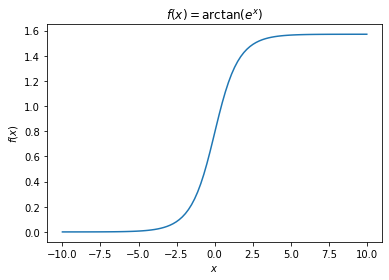

In [5]:
# BEGIN SOLUTION
f = lambda x: np.arctan(np.exp(x))
xs = np.linspace(-10, 10, 100)
ys = f(xs)

plt.plot(xs, ys)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"$f(x) = \arctan \left ( e^x \right )$");
# END SOLUTION

**Question 4.** Write a function `hailstone` that returns the hailstone sequence for a positive integer ``n`` as a ``list``.

In [6]:
def hailstone(n):
    """
    Generate the hailstone sequence of a positive integer.
    """
    # BEGIN SOLUTION
    if n == 1:
        return [n]
    elif n % 2 == 0:
        return [n] + hailstone(n // 2)
    else:
        return [n] + hailstone(3 * n + 1)
    # END SOLUTION

In [7]:
def test_low_hailstones(hailstone):
    assert hailstone(1) == [1]
    assert hailstone(2)  == [2, 1]
    assert hailstone(4) == [4, 2, 1]

test_low_hailstones(hailstone)  # IGNORE

In [8]:
""" # BEGIN TEST CONFIG
points: 3
hidden: true
""" # END TEST CONFIG
def test_high_hailstones(hailstone):
    assert hailstone(20) == [20, 10, 5, 16, 8, 4, 2, 1]
    assert hailstone(9) == [9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

test_high_hailstones(hailstone)  # IGNORE

**Question 5.** Write a function ``gcd`` that takes in two positive integers ``a`` and ``b`` and returns their greatest common divisor.

In [9]:
def gcd(a, b):
    """
    Find the GCD of two positive integers.
    """
    # BEGIN SOLUTION
    if a == 0:
        return b
    return gcd(b % a, a)
    # END SOLUTION

In [10]:
def test_simple_gcds(gcd):
    assert gcd(1, 1) == 1
    assert gcd(2, 1) == 1
    assert gcd(5, 5) == 5
    assert gcd(10, 4) == 2

test_simple_gcds(gcd)  # IGNORE

In [11]:
""" # BEGIN TEST CONFIG
points: 1
hidden: true
""" # END TEST CONFIG
def test_larger_gcds(gcd):
    assert gcd(121, 11) == 11
    assert gcd(807306, 622896) == 4098

test_larger_gcds(gcd)  # IGNORE

**Question 6.** Write a function `box_muller` that takes in two $U(0,1)$ random variables and returns two standard normal random variables using the Box-Muller algorithm. Use this function to generate 1000 standard normal random variables. Make sure to use the provided RNG to generate your $U(0,1)$ RVs.

In [12]:
rng = np.random.default_rng(rng_seed)

def box_muller(u1, u2):
    """
    Generate two standard normal random variables from two U(0,1) random variables.
    """
    # BEGIN SOLUTION
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    return r * np.cos(theta), r * np.sin(theta)
    # END SOLUTION

rvs = np.array([box_muller(rng.random(), rng.random()) for _ in range(500)]).flatten() # SOLUTION

In [13]:
def test_validity(np, rvs, box_muller):
    assert rvs.shape == (1000,)
    assert np.allclose(box_muller(0.5, 0.5), (-1.1774100225154747, 1.4419114153575892e-16))

test_simple_gcds(gcd)  # IGNORE

In [16]:
""" # BEGIN TEST CONFIG
points: 1
hidden: true
""" # END TEST CONFIG
def test_values(np, rvs):
    test_rng = np.random.default_rng(1048)
    idx = test_rng.choice(np.arange(len(rvs)), 10)
    assert np.allclose(rvs[idx], [2.06150769, -1.24834522, -1.03226524, -0.90264717, -0.71005571, -1.340234  ,  1.77047974, -0.31023336,  1.51417285,  0.64113867])

test_values(np, rvs)  # IGNORE